In [2]:
import pandas as pd

data = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv')
data.head()



,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [43]:
data_cars = data[data["Identification.Make"] == "Honda"]
data_cars

filter_data = data_cars[data_cars["Fuel Information.Fuel Type"] == "Gasoline"]
filter_data

outliers = filter_data[filter_data["Engine Information.Engine Statistics.Horsepower"] < filter_data["Engine Information.Engine Statistics.Horsepower"].quantile(0.90)]
outliers

features = outliers[["Fuel Information.Highway mpg", "Engine Information.Engine Statistics.Horsepower"]]
features

from sklearn import preprocessing 
scalar = preprocessing.MinMaxScaler()
names = features.columns 
data = scalar.fit_transform(features)
df = pd.DataFrame(data, columns=names)
df

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,0.523810,0.548872
1,0.523810,0.548872
2,0.523810,0.548872
3,0.523810,0.548872
4,0.523810,0.548872
...,...,...
172,0.238095,1.000000
173,0.190476,1.000000
174,0.238095,1.000000
175,0.190476,1.000000


[-0.59921419]
[0.18973875]


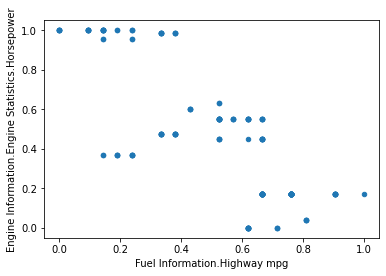

In [51]:
from sklearn.linear_model import LinearRegression 
import numpy as np
import matplotlib.pyplot as plt

x = df["Engine Information.Engine Statistics.Horsepower"]
x_reshape = np.array(x).reshape(-1, 1)
y = df["Fuel Information.Highway mpg"]

regressor = LinearRegression()
regressor.fit(x_reshape,y)

coef = regressor.coef_
print(coef)

predict_y = regressor.predict([[1]])
print(predict_y)


df.plot.scatter(x=0, y=1)
m, b = np.poly
